In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv")#.sort_values(by="event")
price_matrix = pd.read_csv("price_matrix.csv")
random_search_log = pd.read_csv("random_search_log.csv")

# cummulative max fitness
random_search_log['max_fitness'] = random_search_log.fitness.cummax()

In [101]:
num_customers = event_history.customer.max() + 1

event_history['welfare'] = 0
event_history.loc[event_history.event == 'sold', 'welfare'] = event_history['customer_wtp'] - event_history['price']
event_history['profit'] = 0
event_history.loc[event_history.event == 'sold', 'profit'] = event_history['price']

## ES performance population and offspring

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15716/3624110498.py:24: SyntaxWarning: invalid escape sequence '\s'
  axs[1].set_ylabel("Mutation Strength $\sigma_t$")


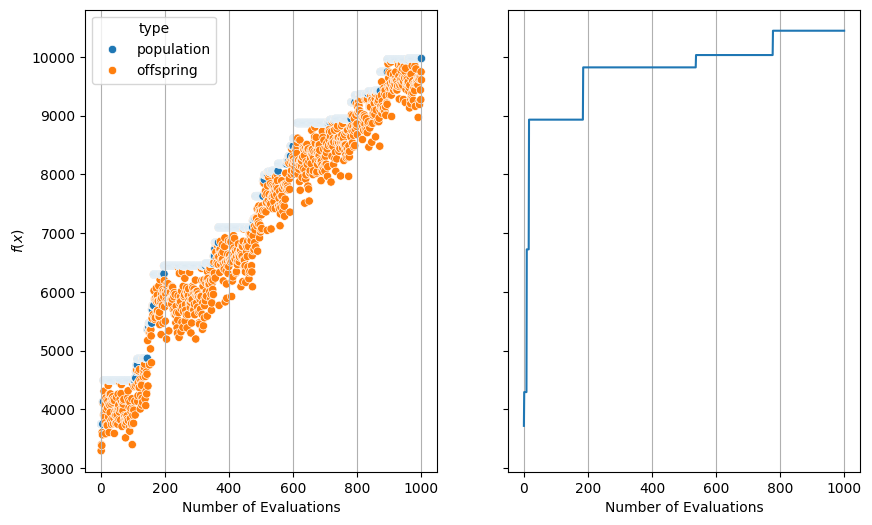

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.scatterplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["run_id"] == 0],
    hue="type",
    ax=axs[0],
)

sns.lineplot(
    x="evaluation",
    y="max_fitness",
    data=random_search_log,
    ax=axs[1],
)

# ax.legend()
axs[0].set_ylabel("$f(x)$")
axs[0].grid(axis="x")
axs[1].grid(axis="x")
axs[0].set_xlabel("Number of Evaluations")
axs[1].set_xlabel("Number of Evaluations")

axs[1].set_ylabel("Mutation Strength $\sigma_t$")
plt.show()

### rechenberg vs none

Text(0.5, 0, 'Number of Evaluations')

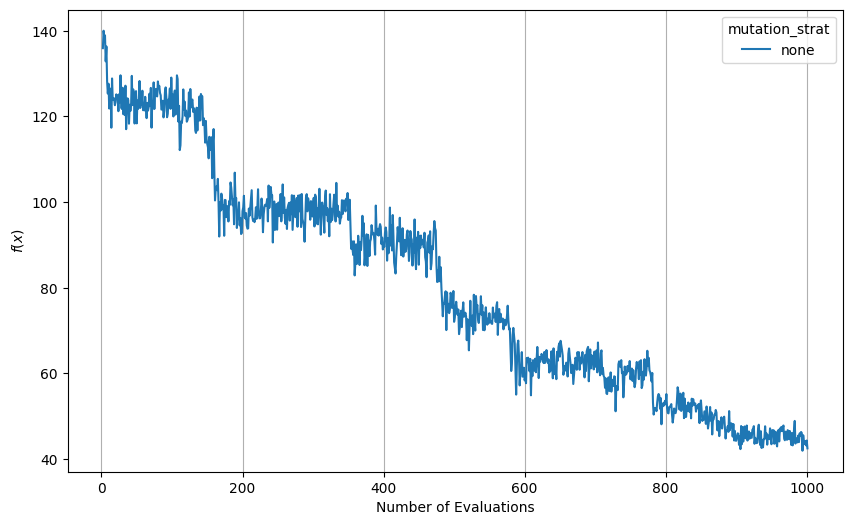

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))

res = evolution_log.groupby(["n_evals", "mutation_strat", "run_id"]).agg(
    {"avg_regret": "mean"}
).reset_index()

sns.lineplot(x="n_evals", y="avg_regret", data=res, hue="mutation_strat", ax=ax)

ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
ax.set_xlabel("Number of Evaluations")

# Price Matrix

<Axes: xlabel='t', ylabel='price'>

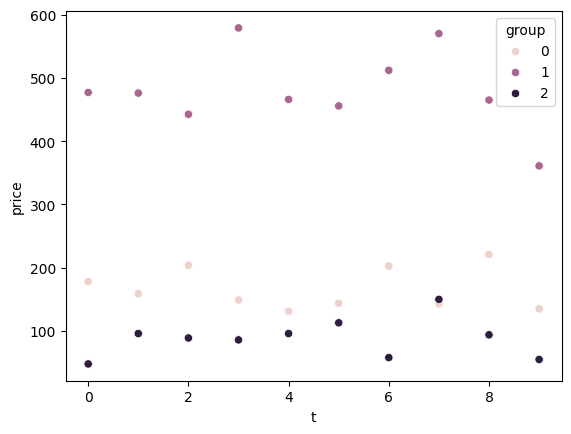

In [104]:
sns.scatterplot(data=price_matrix.loc[(price_matrix.t < 10) & (price_matrix.visit == 0)], x='t', hue='group', y='price')

In [ ]:
sns.heatmap(price_matrix.head(30).pivot(index="group", columns="visit", values="price"))

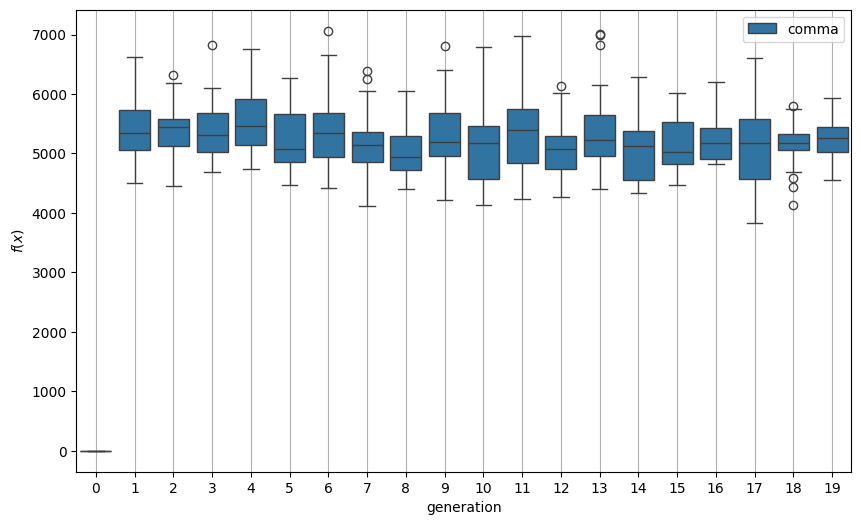

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x="generation",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="selection",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

## Steady State ES

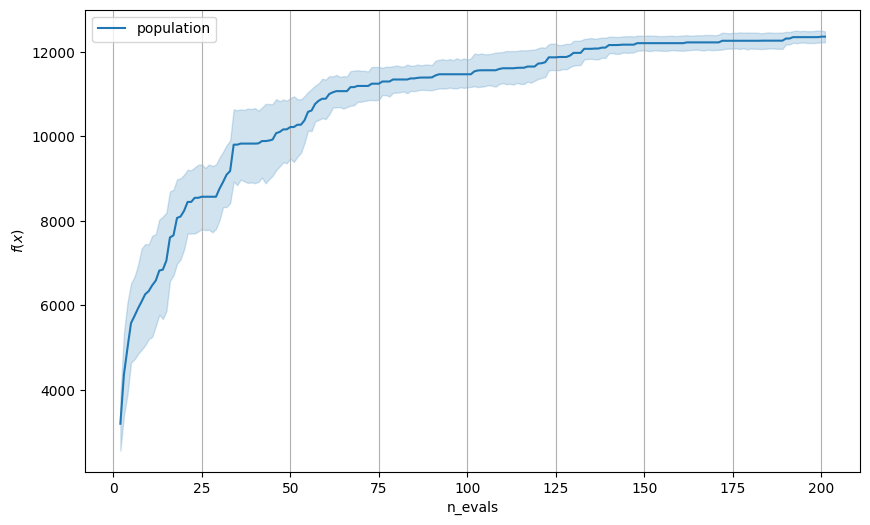

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

<Axes: xlabel='n_evals', ylabel='mutation_strength'>

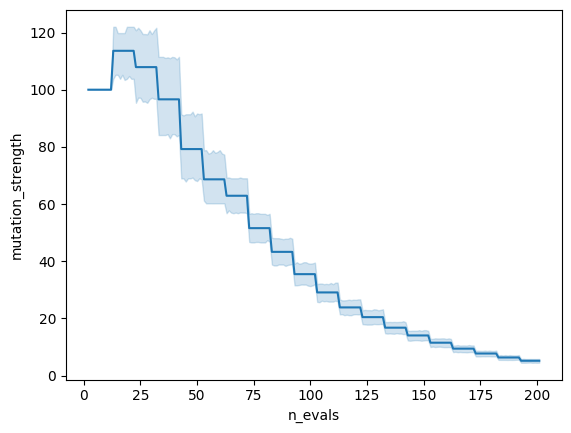

In [ ]:
sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[evolution_log["type"] == "population"],
)